<a href="https://colab.research.google.com/github/ravishankar-cloud/machine-learning/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets

In [20]:
n_pts=500
X,y=datasets.make_circles(n_samples=n_pts,random_state=123,noise=0.1,factor=0.2)

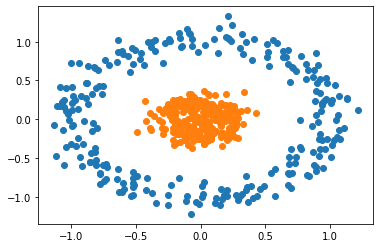

In [21]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [22]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics=['accuracy'])


In [23]:
h = model.fit(x=X,y=y,verbose=1,batch_size=20,epochs=100,shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5460
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.3780
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.6520
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5300
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5140
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6160
Epoch 7/100
25/25 [==============================] - 0s 984us/step - loss: 0.6901 - accuracy: 0.6380
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5360
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5120
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6640
Epoch 1

Text(0.5, 1.0, 'accuracy')

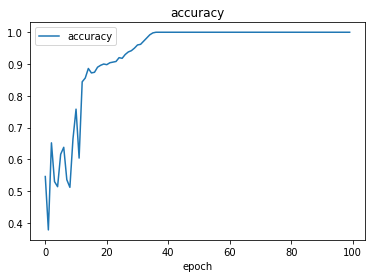

In [25]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

In [29]:
def plot_decision_boundary(X,y,model):
  x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
  y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
  xx,yy=np.meshgrid(x_span,y_span)
  xx_,yy_=xx.ravel(),yy.ravel()
  grid=np.c_[xx_,yy_]
  pred_func=model.predict(grid)
  z=pred_func.reshape(xx.shape)
  plt.contourf(xx,yy,z)


79/79 [==============================] - 0s 807us/step


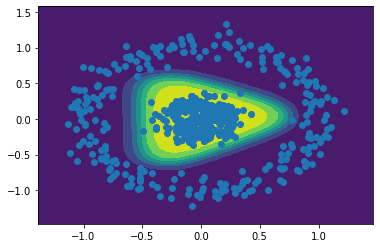

In [30]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 19ms/step
Prediction is  [[0.9900992]]


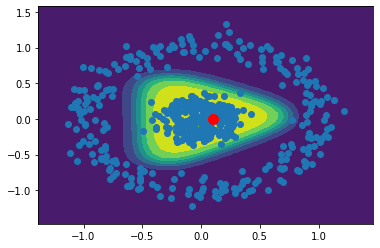

In [33]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x=0.1
y=0
point=np.array([[x,y]])
prediction=model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='red')
print("Prediction is ",prediction)